# Proyecto 4: Informe Final Carrera

## Resumen del proyecto

Profundiza y ajusta la resolución de tus proyectos. Agrega una fuente de datos, prueba un modelo nuevo o responde una pregunta nueva. Elabora un informe final que describa el proceso de toma de decisiones. Sustenta la razón por la cual usaste las librerías y aplicaste los métodos al dataset. Todos tus hallazgos deberán ser comunicados en función de la problemática y las preguntas que buscabas responder.

# ¡Bienvenidos al cuarto proyecto!

## Link en GitHub para este proyecto: 

### ¿Por qué procesamiento de Lenguaje Natural (NLP)?



Decidí elegir NLP, ya que, considero que estamos inmersos en palabras.Somos lenguaje

Es por ello, que trabajar en este proyecto era darle una oprotunidad a ir un poco mas alla de las interpretaciones comunes y en mi caso generar un aprendisaje que pueda usar en mi profesion como medico.
Particularmente la medicina esta llena de palabras que determinan tratamientos,farmacos diagnosticos y su procesamienot nos puede traer mucha informacion. Asi por eso decidi conocer un poco mas sobre esto .

### ¿Cómo pensé la resolución a este proyecto?

Tal como comenté al final del proyecto 3, mi idea era mejorar el rendimiento de la clasificación binaria.
Link Proyecto 3: https://github.com/eduardofigueroa/Proyecto-ACAMICA-3

**NOTA**: El proyecto 3 se basó en implementar un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondientes. En una segunda parte, se convertió en un problema de Machine Learning binario, es decir, se asignaron únicamente etiquetas Positivas y Negativas a cada crítica y por lo tanto, hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. 

Para lograr mejorar el rendimiento de la clasificación binaria, pensé en abordar este tema de dos maneras (las cuales son complementarias, claro!):

- Profundizar en el Análisis Exploratorio de datos (EDA): 

El objetivo era mejorar las palabras o bloques de palabras que alimentarán al vectorizado. La importancia de esto, radica en que serán éstas las palabras que luego serán vectorizadas, por ello es importante, que sean palabras que se ajusten de mejor manera a las clases. Entre las acciones para esto, investigaré a fondo las palabras que se encuentran dentro de las `stop words` que ofrece la librería spaCy, para determinar si hay algunas que valdrían la pena que no sean consideradas como tales. 

- Implementar un nuevo modelo:

Para realizar esta segunda parte pensé en aplicar redes neuronales. He leído que funcionan de muy buena manera para los problemas de clasificación. Además, tal como era solicitado en la consigna, es un método nuevo, no aplicado hasta el momento en el proyecto 3. Cabe destacar que redes neuronales no fue parte de las clases dadas, sino que hubo solo una introducción del tema en un workshop.

El proyecto estará dividido de la siguiente manera:



### Parte A: profundización en el Análisis Exloratorio de Datos (EDA) 

- Cargo todas las librerías para el proyecto completo
- Cargo todos los dataset (TRAIN, DEV, TEST)
- Columnas a usar 
- Normalización de los dataset
	- Elimino los emojis y emoticones
	- Elimino los números 
	- Llevo a minúsculas, elimino puntuaciones, elimino `stop words`y hago la lemmatización. 
	- Cambio vocales con acento por vocales sin acento
    - Corroboro la existencia de valores faltantes luego de toda la limpieza en los datasets
- Pregunta: ¿La modificación de las stopwords tuvo algún impacto en las etiquetas positivas y negativas?


### Parte B: Modelo benchmark

- Modelo
- Accuracy y matriz de confusión

### Parte C: Mejora del modelo benchmark

- Asignación de etiquetas
- Distribución de acuerdo a la etiqueta
- Elección de la métrica de evaluación
- Encodeado de etiquetas
- Vectorizado
- Red neuronal artificial
- Comparación con el modelo benchmark

# Parte A: profundización en el Análisis Exloratorio de Datos (EDA) 

- Cargo todas las librerías para el proyecto completo

In [1]:
import re
import string
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
from spacy.lang.es import Spanish
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import gc 
import winsound
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from numpy.random import seed
from keras.models import Sequential
from keras import layers
from keras.layers import Dropout
from keras.utils import plot_model
from plot_keras_history import plot_history
import sklearn.model_selection
import sklearn.preprocessing
import keras
from keras.regularizers import l2

Using TensorFlow backend.


In [2]:
#Para notificar el final de un proceso (útil para aquellos de larga duración)
duration = 1000  # milliseconds
freq = 440  # Hz

- Cargo todos los dataset (TRAIN, DEV, TEST)

In [3]:
#Cargo el dataset TRAIN
dataset_train = pd.read_json('dataset_es_train.json', lines=True)
print(dataset_train.shape)
dataset_train.head()

(200000, 8)


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [4]:
#Cargo el dataset DEV
dataset_dev = pd.read_json('dataset_es_dev.json', lines=True)
print(dataset_dev.shape)
dataset_dev.head()

(5000, 8)


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


In [5]:
#Cargo el dataset TEST
dataset_test = pd.read_json('dataset_es_test.json', lines=True)
print(dataset_test.shape)
dataset_test.head()

(5000, 8)


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase


- Columnas a usar 

Basado en la información que contienen, las columnas con las que trabajaré son: `stars`,`review_body` y `review_title`

Por otro lado, decidí fusionar la información contenida en `review_title` y en `review_body` para poseer todo el texto junto y poder realizar el análisis conjunto de toda la información contenida en ellos.

In [6]:
#Combinar el texto en una sola columna: review_data y review_body en review_title_body para TRAIN
dataset_train['review_title_body']  = dataset_train['review_title']+' '+dataset_train['review_body']
del dataset_train['review_id']
del dataset_train['product_id']
del dataset_train['reviewer_id']
del dataset_train['review_body']
del dataset_train['review_title']
del dataset_train['language']
del dataset_train['product_category']

dataset_train

,stars,review_title_body
0,1,television Nevir Nada bueno se me fue ka panta...
1,1,Dinero tirado a la basura con esta compra Horr...
2,1,solo llega una unidad cuando te obligan a comp...
3,1,PRODUCTO NO RECIBIDO. No entro en descalificar...
4,1,Devuelto Llega tarde y co la talla equivocada
...,...,...
199995,5,Tal y como se describe Mando funciona perfecta...
199996,5,Funciona perfectamente Compré la batería con c...
199997,5,Buena calidad. Buena calidad. Satisfecha con l...
199998,5,Recomendado Perfecto para el cumple de mi hijo


In [7]:
#Combinar el texto en una sola columna: review_data y review_body en review_title_body para DEV
dataset_dev['review_title_body']  = dataset_dev['review_title']+' '+dataset_dev['review_body']
del dataset_dev['review_id']
del dataset_dev['product_id']
del dataset_dev['reviewer_id']
del dataset_dev['review_body']
del dataset_dev['review_title']
del dataset_dev['language']
del dataset_dev['product_category']

In [8]:
#Combinar el texto en una sola columna: review_data y review_body en review_title_body para TEST
dataset_test['review_title_body']  = dataset_test['review_title']+' '+dataset_test['review_body']
del dataset_test['review_id']
del dataset_test['product_id']
del dataset_test['reviewer_id']
del dataset_test['review_body']
del dataset_test['review_title']
del dataset_test['language']
del dataset_test['product_category']

- Normalización de los dataset

Consiste en llevar todo el texto a un formato común. Entre las acciones se incluyen: eliminar emojis, eliminar puntuaciones, eliminar palabras frecuentes o llamadas `stop words`, llevar a minúsculas, tokenizar (extraer oraciones o palabras dentro de un texto) y llevar las palabras a su raíz, mediante derivación regresiva, es decir, eliminando afijos de las palabras y encontrar la palabra raíz (palabra: increases --> incres) o mediante lematización, algo similar a la derivación regresiva, pero mas del mundo real (palabra: increases --> increase). 

    - Elimino los emojis y emoticones

Eliminar los emojis para quedarme solo con palabras.

In [9]:
#Elimino los emojis de dataset TRAIN
dataset_train['review_title_body'] = dataset_train['review_title_body'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
dataset_train

,stars,review_title_body
0,1,television Nevir Nada bueno se me fue ka panta...
1,1,Dinero tirado a la basura con esta compra Horr...
2,1,solo llega una unidad cuando te obligan a comp...
3,1,PRODUCTO NO RECIBIDO. No entro en descalificar...
4,1,Devuelto Llega tarde y co la talla equivocada
...,...,...
199995,5,Tal y como se describe Mando funciona perfecta...
199996,5,Funciona perfectamente Compré la batería con c...
199997,5,Buena calidad. Buena calidad. Satisfecha con l...
199998,5,Recomendado Perfecto para el cumple de mi hijo


In [10]:
#Elimino los emojis del dataset DEV
dataset_dev['review_title_body'] = dataset_dev['review_title_body'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

In [11]:
#Elimino los emojis del dataset TEST
dataset_test['review_title_body'] = dataset_test['review_title_body'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

    - Elimino los números 

En los datasets, solo quería quedarme con palabras, por lo que la existencia de números consideraba que no iban a aportar información y por ello los quité.

In [12]:
no_number_train=[]
for review in dataset_train.review_title_body:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    review = re.sub("[^A-Za-záéíóúÁÉÍÓÚÑñü]"," ",str(review))
    review = re.sub(' +', ' ',str(review))
    no_number_train.append(review)

In [13]:
dataset_train['review_title_body'] = no_number_train

In [14]:
no_number_dev=[]
for review in dataset_dev.review_title_body:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    review = re.sub("[^A-Za-záéíóúÁÉÍÓÚÑñü]"," ",str(review))
    review = re.sub(' +', ' ',str(review))
    no_number_dev.append(review)

In [15]:
dataset_dev['review_title_body'] = no_number_dev

In [16]:
no_number_test=[]
for review in dataset_test.review_title_body:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    review = re.sub("[^A-Za-záéíóúÁÉÍÓÚÑñü]"," ",str(review))
    review = re.sub(' +', ' ',str(review))
    no_number_test.append(review)

In [17]:
dataset_test['review_title_body'] = no_number_test

    - Llevo a minúsculas, elimino puntuaciones, elimino stop words y hago la lemmatización. 

El llevar a minúsculas, permite que palabras iguales, que solo se diferencien en si están todas o parcialmente escritas en mayúsculas, no sean consideradas como palabras diferentes.

Las puntuaciones, no aportan información, y no es el objetivo, que lo mas frecuente sea un signo de puntuación.

Por otro lado, las `stop words` son un conjunto de palabras de uso común en un idioma. Ejemplo son "a", "la", "el", "es", "son", etc. Al eliminar las palabras con poca información del texto, solo nos quedamos con las palabras importantes.

Por último, la lematización es el proceso de convertir una palabra a su forma básica. Así por ejemplo, palabras como riendo, rien...se lemmatizan a la palabra reir, teniendo una sola palabra.

**NOTA**: para realizar toda esta parte utilicé la librería spaCy. Decidí usar esta librería, ya que, es la recomendada para el idioma español. Pude probar otras alternativas, pero el mejor resultado lo obtuve con spaCy. 

**NOTA 2:** el modelo que decidí utlizar de la librería spaCy es 'es_core_news_lg'. La librería ofrece tres modelos para el idioma español: los modelos centrales sm, md y lg de spaCy se entrenaron con los mismos datos en las mismas condiciones. La única diferencia son los vectores que se incluyen, que se utilizan como características y, por lo tanto, tienen un impacto en la precisión del modelo.

**NOTA 3:** basándome en haber corrido varias veces la función `normalize` y haber analizado los resultados subsiguientes, decido incorporar otras palabras, como si fueran stop words (**'otros'**). 

**MODIFICACIONES AL PROYECTO 3** 

Al evaluar las palabras consideradas como stopwords en el idioma español, dentro de ellas, se incluían palabras como **no, si, sí, bien, buen, bueno, buenos, buena, buenas, peor, bajo, mal, mejor, nada**. Decidí considerar estas palabras como **'no stop words'** ya que considero que son palabras claves para definir si un comentario tiene un sentido mas positivo o mas negativo. 

In [18]:
#Imprimo las stopwords del idioma español
stops = spacy.lang.es.stop_words.STOP_WORDS
#stops

In [19]:
#Función patra llevar a minúsculas, eliminar stopwords, puntuaciones y lemmatizar

nlp = spacy.load('es_core_news_lg')

def normalize(comment, lowercase, remove_stopwords):
    
    punctuations = string.punctuation
    stops = spacy.lang.es.stop_words.STOP_WORDS
    non_stops = ['no', 'si', 'sí', 'bien','buen','bueno','buenos','buena','buenas','peor', 'bajo', 'mal', 'mejor','nada']
    otros = ['y', 'e', 'a', 'o', 'para', 'pare', 'paro', 'como', 'q','..','...','....', '.....','.......', '...........',
             '¡','¿']

    if lowercase:
        comment = comment.lower()
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        if word.text not in non_stops:
            if not remove_stopwords or (remove_stopwords and word.text not in stops): 
                if word.text not in punctuations:
                    if word.text not in otros:
                        lemma = word.lemma_.strip()
                        lemmatized.append(lemma)
        elif word.text in non_stops:
            lemma = word.lemma_.strip()
            lemmatized.append(lemma)
            
    return " ".join(lemmatized)

In [20]:
#Aplico la función normalize para TRAIN y creo la columna clean
dataset_train['clean'] = dataset_train['review_title_body'].apply(normalize, lowercase=True, remove_stopwords=True)
dataset_train

,stars,review_title_body,clean
0,1,television Nevir Nada bueno se me fue ka panta...,television nevir nadar bueno ka pantalla mesar...
1,1,Dinero tirado a la basura con esta compra Horr...,dinero tirar basura comprar horrible tener com...
2,1,solo llega una unidad cuando te obligan a comp...,llegar unidad obligar comprar obligar comprar ...
3,1,PRODUCTO NO RECIBIDO No entro en descalificar ...,producto no recibir no entrar descalificar ven...
4,1,Devuelto Llega tarde y co la talla equivocada,devolver llegar co tallar equivocar
...,...,...,...
199995,5,Tal y como se describe Mando funciona perfecta...,describir mandar funcionar perfectamente cumpl...
199996,5,Funciona perfectamente Compré la batería con c...,funcionar perfectamente comprar batería retice...
199997,5,Buena calidad Buena calidad Satisfecha con la ...,bueno calidad bueno calidad satisfacer comprar
199998,5,Recomendado Perfecto para el cumple de mi hijo,recomendar perfecto cumplir hijo


In [21]:
#Aplico la función normalize para DEV y creo la columna clean
dataset_dev['clean'] = dataset_dev['review_title_body'].apply(normalize, lowercase=True, remove_stopwords=True)

In [22]:
#Aplico la función normalize para TEST y creo la columna clean
dataset_test['clean'] = dataset_test['review_title_body'].apply(normalize, lowercase=True, remove_stopwords=True)

In [23]:
#winsound.Beep(freq, duration)

    - Cambio vocales con acento por vocales sin acento

En el caso del idioma español, es importante quitar los acentos, ya que escribir **batería** o **bateria**, serían la misma palabra, pero a nivel de análisis, serían consideradas como dos palabras diferentes.

In [24]:
#Quito los acentos al dataset TRAIN
dataset_train['clean'] = dataset_train['clean'].str.replace(u"á", "a")
dataset_train['clean'] = dataset_train['clean'].str.replace(u"é", "e")
dataset_train['clean'] = dataset_train['clean'].str.replace(u"í", "i")
dataset_train['clean'] = dataset_train['clean'].str.replace(u"ó", "o")
dataset_train['clean'] = dataset_train['clean'].str.replace(u"ú", "u")

In [25]:
#Quito los acentos al dataset DEV
dataset_dev['clean'] = dataset_dev['clean'].str.replace(u"á", "a")
dataset_dev['clean'] = dataset_dev['clean'].str.replace(u"é", "e")
dataset_dev['clean'] = dataset_dev['clean'].str.replace(u"í", "i")
dataset_dev['clean'] = dataset_dev['clean'].str.replace(u"ó", "o")
dataset_dev['clean'] = dataset_dev['clean'].str.replace(u"ú", "u")

In [26]:
#Quito los acentos al dataset TEST
dataset_test['clean'] = dataset_test['clean'].str.replace(u"á", "a")
dataset_test['clean'] = dataset_test['clean'].str.replace(u"é", "e")
dataset_test['clean'] = dataset_test['clean'].str.replace(u"í", "i")
dataset_test['clean'] = dataset_test['clean'].str.replace(u"ó", "o")
dataset_test['clean'] = dataset_test['clean'].str.replace(u"ú", "u")

    - Corroboro la existencia de valores faltantes luego de toda la limpieza en los datasets

In [27]:
#Función para determinar valores faltantes por columnas
def missing_values (data):
    return data.isna().sum()

In [28]:
#Valores faltantes por columnas en el dataset TRAIN
missing_values (dataset_train)

stars                0
review_title_body    0
clean                0
dtype: int64

In [29]:
#Valores faltantes por columnas en el dataset DEV
missing_values (dataset_dev)

stars                0
review_title_body    0
clean                0
dtype: int64

In [30]:
#Valores faltantes por columnas en el dataset TEST
missing_values (dataset_test)

stars                0
review_title_body    0
clean                0
dtype: int64

Como se observa, luego de toda la limpieza de los dataset TRAIN, DEV y TEST, no hay datos faltantes.

In [31]:
gc.collect()

230

**¿La modificación de las stopwords tuvo algún impacto en las etiquetas positivas y negativas?**

- Asignación de etiquetas

La asignación de las etiquetas como positivas y negativas, las definí como:

- Etiquetas `negativa`: estrellas ≤ 3 
- Etiquetas `positiva`: 3 < puntaje de calificación ≤ 5

- Se calcularan las palabras mas frecuentes por etiqueta

In [32]:
#Dataset para etiqueta negativas
dataset_negativo = dataset_train.loc[((dataset_train['stars'] == 1) |
                                      (dataset_train['stars'] == 2) |
                                      (dataset_train['stars'] == 3))]

#Dataset para etiqueta positivas
dataset_positivo = dataset_train.loc[((dataset_train['stars'] == 4) |
                                      (dataset_train['stars'] == 5))]

In [33]:
def tokenizar_lista(data):
    nombre_lista = []
    for i in range(data.shape[0]):
        token = data.iloc[i].clean
        token = nlp(token) 
        nombre_lista.append(token)
    return nombre_lista

In [34]:
#Tokenizar y generar una lista con las palabras tokenizadas para las etiquetas negativas
lista_token_neg = tokenizar_lista(dataset_negativo)

#Tokenizar y generar una lista con las palabras tokenizadas para las etiquetas positivas
lista_token_pos = tokenizar_lista(dataset_positivo)

In [35]:
#Función para convertir una lista de listas en una única lista
def only_list(data_lista):   
    data_lista = list(itertools.chain(*data_lista))
    #Para hacer la lista, como una lista de string
    lista_de_tokens = [i.text for i in data_lista]
    return lista_de_tokens

In [36]:
#Convertir una lista de listas en una única lista para las etiquetas negativas
list_of_token_neg = only_list(lista_token_neg)

#Convertir una lista de listas en una única lista para las etiquetas positivas
list_of_token_pos = only_list(lista_token_pos)

In [37]:
#Cuento la frecuencia de palabras en la lista de las etiquetas negativas
word_freq_neg = Counter(list_of_token_neg)

#Cuento la frecuencia de palabras en la lista de las etiquetas positivas
word_freq_pos = Counter(list_of_token_pos)

In [38]:
#Creo un dataframe definiendo las columnas 'Palabra' y 'Frecuencia' para las etiquetas negativas
df_word_freq_neg = pd.DataFrame(list(word_freq_neg.items()), columns = ['Palabra','Frecuencia'])

#Creo un dataframe definiendo las columnas 'Palabra' y 'Frecuencia' para las etiquetas positivas
df_word_freq_pos = pd.DataFrame(list(word_freq_pos.items()), columns = ['Palabra','Frecuencia'])

In [39]:
# Ordena la frecuencias de palabras de manera ascendente para las etiquetas negativas
df_word_freq_neg.sort_values('Frecuencia', inplace = True, ascending = False)

# Ordena la frecuencias de palabras de manera ascendente para las etiquetas positivas
df_word_freq_pos.sort_values('Frecuencia', inplace = True, ascending = False)

In [40]:
# Reseteo el index en cada dataset
df_word_freq_neg.reset_index(drop = True, inplace=True)

df_word_freq_pos.reset_index(drop = True, inplace=True)

In [41]:
#Función para hacer el gráfico de frecuencia de palabras 
def plot_frequent_words (etiqueta, data):
    plt.figure(figsize = (15,8))
    plot = sns.barplot(x  = data.iloc[:30].Palabra, y = data.iloc[:30].Frecuencia, palette = 'magma')
    for item in plot.get_xticklabels():
        item.set_rotation(90)    
    plot.set_title(f'Gráfico para etiqueta {etiqueta}')
    plt.show()

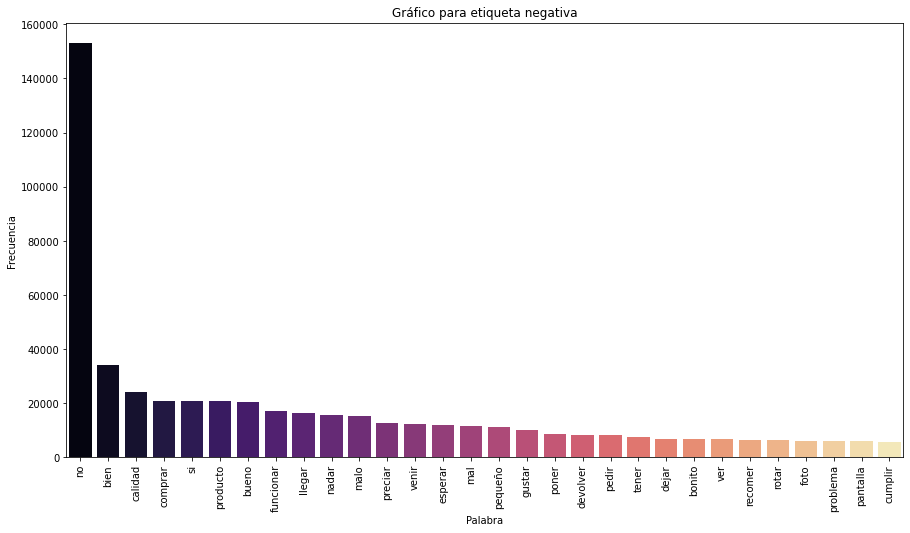

In [42]:
#Gráfico de frecuencia de palabras para la etiqueta negativa
plot_frequent_words ('negativa', df_word_freq_neg)

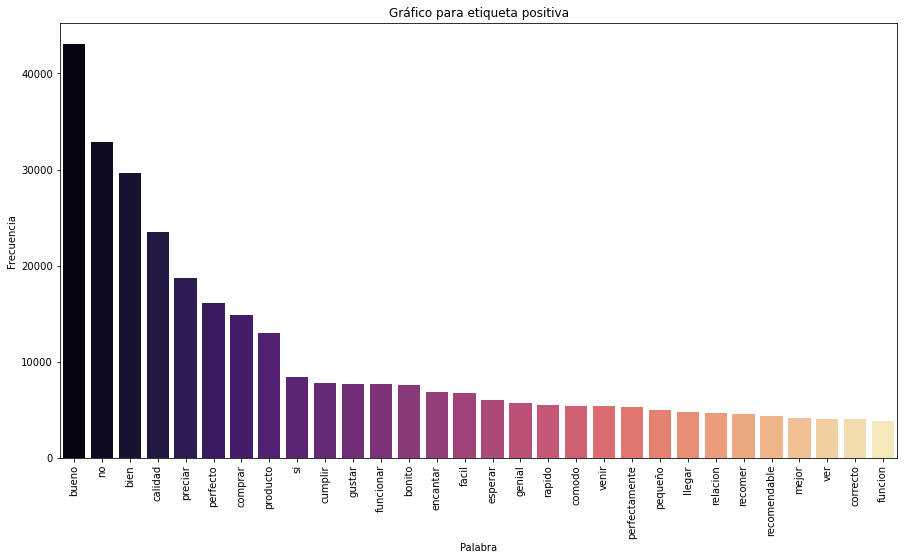

In [43]:
#Gráfico de frecuencia de palabras para la etiqueta positiva
plot_frequent_words ('positiva', df_word_freq_pos)

Como se puede observar en los gráficos, dentro de las 30 palabras mas frecuentes por etiquetas, aparecieron las palabras **no, si, bien, bueno, mejor, mal**, indicando que estas palabras, previamente eliminadas por ser consideradas como `stop words`, son palabras frecuentes y podrían tener un papel importante en cada una de las etiquetas.

In [44]:
gc.collect()

17553

# Parte B: Modelo benchmark

- Modelo 

Como modelo benchmark usaré los resultados del **modelo binario optimizado obtenido en el proyecto 3** . A continuación, copiaré los parámetros usados en el modelo, el accuracy del modelo y la matriz de confusión obtenida.

**NOTA**: los resultados expuestos a continuación fueron los obtenidos del modelo validado con el dataset TEST

Para generar el modelo:

   - El **vectorizado** se realizó usando el TfidfVectorizer, con los siguientes parámetros:
    - ngram_range = (1,2)
    - min_df = 30
    - max_features = 1000


   - El modelo fue un **Linear SVC**, con los siguientes parámetros:
    - dual = False 
    - random_state = 42
    - penalty = 'l2'
    - C = 5
    - loss = 'squared_hinge'
    - tol = 0.01

- Accuracy y matriz de confusión

El accuracy para Train y Test y la matriz de confución para Test fue:

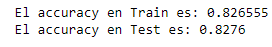

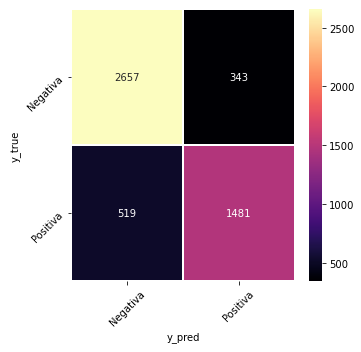

En el modelo el accuracy para el conjunto de Train fue de 0.826 y para el conjunto de Test fue de 0.828. Predice de manera correcta un 88.9% de la etiqueta negativa y un 74.05% de la etiqueta positiva en el Test.

# Parte C: Mejora del modelo benchmark

Tal como comenté anteriormente, la mejora del modelo benchmark la iba a abordar de dos maneras: 

- Una de ellas era mejorar el EDA, lo cual ya lo apliqué en el punto A, mejorando las stopwords y viendo como muchas de ellas aparecían entre las palabras mas frecuentes de acuerdo a la etiqueta.

- Por otro lado, iba a proponer un nuevo modelo, que es lo que voy a desarrollar a continuación: será un modelo de Red Neuronal.

- Asignación de etiquetas

La asignación de las etiquetas como positivas y negativas, las definí como:

- Etiquetas `negativa`: estrellas ≤ 3 
- Etiquetas `positiva`: 3 < puntaje de calificación ≤ 5

In [45]:
#Defino dataset en TRAIN
dataset_train_bin= dataset_train.copy()
dataset_train_bin = dataset_train_bin.reset_index(drop=True)

d={1:'negativa', 2:'negativa', 3: 'negativa', 4:'positiva', 5:'positiva'} 
dataset_train_bin['label'] = dataset_train_bin.stars.apply(lambda x:d[x])

dataset_train_bin

,stars,review_title_body,clean,label
0,1,television Nevir Nada bueno se me fue ka panta...,television nevir nadar bueno ka pantalla mesar...,negativa
1,1,Dinero tirado a la basura con esta compra Horr...,dinero tirar basura comprar horrible tener com...,negativa
2,1,solo llega una unidad cuando te obligan a comp...,llegar unidad obligar comprar obligar comprar ...,negativa
3,1,PRODUCTO NO RECIBIDO No entro en descalificar ...,producto no recibir no entrar descalificar ven...,negativa
4,1,Devuelto Llega tarde y co la talla equivocada,devolver llegar co tallar equivocar,negativa
...,...,...,...,...
199995,5,Tal y como se describe Mando funciona perfecta...,describir mandar funcionar perfectamente cumpl...,positiva
199996,5,Funciona perfectamente Compré la batería con c...,funcionar perfectamente comprar bateria retice...,positiva
199997,5,Buena calidad Buena calidad Satisfecha con la ...,bueno calidad bueno calidad satisfacer comprar,positiva
199998,5,Recomendado Perfecto para el cumple de mi hijo,recomendar perfecto cumplir hijo,positiva


In [46]:
#Defino dataset en DEV
dataset_dev_bin = dataset_dev.copy()
dataset_dev_bin = dataset_dev_bin.reset_index(drop=True)

#Asigno etiquetas
d={1:'negativa', 2:'negativa', 3: 'negativa', 4:'positiva', 5:'positiva'}    
dataset_dev_bin['label'] = dataset_dev_bin.stars.apply(lambda x:d[x])

In [47]:
#Defino dataset en TEST
dataset_test_bin = dataset_test.copy()
dataset_test_bin = dataset_test_bin.reset_index(drop=True)

#Asigno etiquetas
d={1:'negativa', 2:'negativa', 3: 'negativa', 4:'positiva', 5:'positiva'} 
dataset_test_bin['label'] = dataset_test_bin.stars.apply(lambda x:d[x])

- Distribución de acuerdo a la etiqueta

In [48]:
def count_labels (data_, data):
    plt.figure(figsize = (5,5))
    plot = sns.countplot(data['label'], palette = 'magma')
    plot.set_title(f'Gráfico para el dataset {data_}', fontsize = 'x-large')
    plt.xlabel('Etiqueta', fontsize = 'large' )
    plt.ylabel ('Cantidad', fontsize = 'large')
    plt.show()

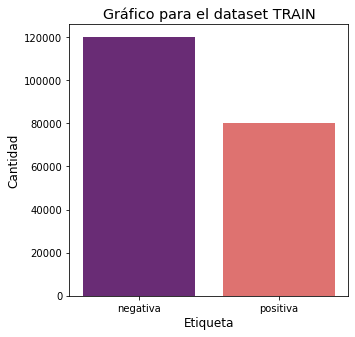

In [49]:
#Cuento el número de casos de acuerdo a las etiquetas en el datatset TRAIN
count_labels ('TRAIN', dataset_train_bin)

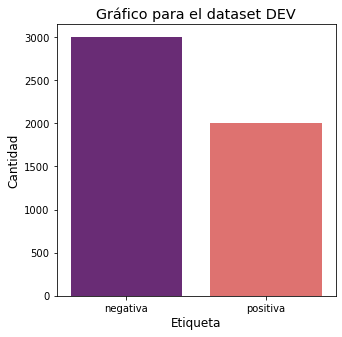

In [50]:
#C#Cuento el número de casos de acuerdo a las etiquetas en el datatset DEV
count_labels ('DEV', dataset_dev_bin)

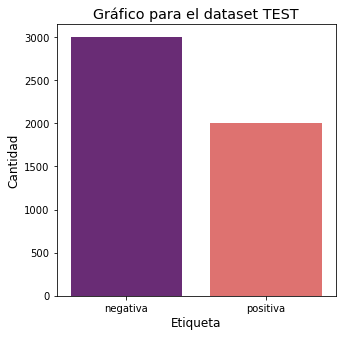

In [51]:
#Cuento el número de casos de acuerdo a las etiquetas en el datatset TEST
count_labels ('TEST', dataset_test_bin)

Como se ven en los gráficos, las categorías no son balanceadas, sin embargo, dicho desbalance es muy poco (60% clase negativa - 40% clase positiva en los tres datasets).

- Elección de la métrica de evaluación

Un problema de clasificación puede estar un poco sesgado, como si hubiera un ligero desequilibrio. Alternativamente, el problema de clasificación puede tener un desequilibrio severo donde puede haber cientos o miles de ejemplos en una clase y decenas de ejemplos en otra clase para un conjunto de datos de entrenamiento dado.

**Ligero desequilibrio**: Un problema de clasificación desequilibrado donde la distribución de ejemplos es desigual en una pequeña cantidad en el conjunto de datos de entrenamiento (por ejemplo, 4: 6).


**Desequilibrio severo**: Un problema de clasificación desequilibrado en el que la distribución de ejemplos es muy desigual en el conjunto de datos de entrenamiento (por ejemplo, 1: 100 o más).

Un pequeño desequilibrio no suele ser motivo de preocupación, y el problema a menudo se puede tratar como un problema de modelado predictivo de clasificación normal. Un desequilibrio severo de las clases puede ser difícil de modelar y puede requerir el uso de técnicas especializadas.

Info: https://machinelearningmastery.com/what-is-imbalanced-classification/

La **métrica** elegida para evaluar los modelos fue la exactitud (**accuracy**). La elegí debido a que las clases están ligeremante desbalanceadas. Además, no interesa alguna clase en particular, sino el rendimiento general del modelo.

- Encodeado de etiquetas

¿Por qué encodear las etiquetas? Esto será utilizado para el modelo de Redes Neuronales. Ya que defino dos nodos de salida, es necesario dividir la columna `label`en `label_negativa`y `label_positiva`. 

In [52]:
#Aplico get_dummies para TRAIN
dataset_train_bin = pd.concat([dataset_train_bin, pd.get_dummies(
                                                         dataset_train_bin['label'], 
                                                         prefix='label', 
                                                         prefix_sep = '_')],
                                                         axis=1)
dataset_train_bin

,stars,review_title_body,clean,label,label_negativa,label_positiva
0,1,television Nevir Nada bueno se me fue ka panta...,television nevir nadar bueno ka pantalla mesar...,negativa,1,0
1,1,Dinero tirado a la basura con esta compra Horr...,dinero tirar basura comprar horrible tener com...,negativa,1,0
2,1,solo llega una unidad cuando te obligan a comp...,llegar unidad obligar comprar obligar comprar ...,negativa,1,0
3,1,PRODUCTO NO RECIBIDO No entro en descalificar ...,producto no recibir no entrar descalificar ven...,negativa,1,0
4,1,Devuelto Llega tarde y co la talla equivocada,devolver llegar co tallar equivocar,negativa,1,0
...,...,...,...,...,...,...
199995,5,Tal y como se describe Mando funciona perfecta...,describir mandar funcionar perfectamente cumpl...,positiva,0,1
199996,5,Funciona perfectamente Compré la batería con c...,funcionar perfectamente comprar bateria retice...,positiva,0,1
199997,5,Buena calidad Buena calidad Satisfecha con la ...,bueno calidad bueno calidad satisfacer comprar,positiva,0,1
199998,5,Recomendado Perfecto para el cumple de mi hijo,recomendar perfecto cumplir hijo,positiva,0,1


In [53]:
#Aplico get_dummies para DEV
dataset_dev_bin = pd.concat([dataset_dev_bin, pd.get_dummies(
                                                         dataset_dev_bin['label'], 
                                                         prefix='label', 
                                                         prefix_sep = '_')],
                                                         axis=1)

In [54]:
#Aplico get_dummies parar TEST
dataset_test_bin = pd.concat([dataset_test_bin, pd.get_dummies(
                                                         dataset_test_bin['label'], 
                                                         prefix='label', 
                                                         prefix_sep = '_')],
                                                         axis=1)

- Vectorizado. 


Para comenzar la parte de Machine Learning, lo que haré será realizar la vectorización, esto es necesario ya que los modelos sólo pueden procesar datos numéricos.

TF-IDF es una abreviatura de Término Frecuencia- Frecuencia Inversa de Documentos. Este es un algoritmo muy común para transformar texto en una representación significativa de números, que se utiliza para ajustar el algoritmo de la máquina para la predicción.

En TfidfVectorizer se considera el peso total del documento de una palabra. Nos ayuda a lidiar con las palabras más frecuentes. Usándolo podemos penalizarlos. TfidfVectorizer pondera los recuentos de palabras según una medida de la frecuencia con la que aparecen en los documentos.

Info: https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

Usaré todos sus parámetros por default, a excepción de:

- `ngram_range` = (1,2): significa unigramas y bigramas.
- `min_df`= 30: al construir el vocabulario, ignora los términos que tienen una frecuencia de documento estrictamente más baja que el umbral dado. Esto lo limité ya que, al incluir uni y bigramas el número de features era muy grande (>900000)

In [55]:
# Tomamos la lista de palabras y el vector que nos dice la calificación para TRAIN
lista_reviews_train_bin = list(dataset_train_bin['clean'].values)
label_train_bin = dataset_train_bin.iloc[:, [4,5]]

# Tomamos la lista de palabras y el vector que nos dice la calificación para DEV
lista_reviews_dev_bin = list(dataset_dev_bin['clean'].values)
label_dev_bin = dataset_dev_bin.iloc[:, [4,5]]

#print(label_train_bin)
#print(label_dev_bin)

- Usaré 3000 features, ya que fueron ellos con los que obtuve una mejor performance.

In [56]:
#Instanciamos 
tfidf_bin = TfidfVectorizer(ngram_range = (1,2), min_df = 30, max_features = 3000)

#Entreno y transformo en TRAIN
matriz_reviews_train_bin = tfidf_bin.fit_transform(lista_reviews_train_bin)

#Transformo en DEV
matriz_reviews_dev_bin = tfidf_bin.transform(lista_reviews_dev_bin)

print(matriz_reviews_train_bin.shape)
print(matriz_reviews_dev_bin.shape)

(200000, 3000)
(5000, 3000)


In [57]:
#Cambio el tipo de dato de la matriz 'matriz_reviews_train_bin'
matriz_reviews_train_bin = matriz_reviews_train_bin.astype('float32')

#Cambio el tipo de dato de la matriz 'matriz_reviews_dev_bin'
matriz_reviews_dev_bin = matriz_reviews_dev_bin.astype('float32')

- Modelado

In [58]:
#Con el dataset TRAIN determino el X_train y el y_train
X_train = matriz_reviews_train_bin.toarray()
y_train = label_train_bin

print(X_train.shape)
print(y_train.shape)

(200000, 3000)
(200000, 2)


In [59]:
#Con el dataset DEV determino el X_test y el y_test
X_test = matriz_reviews_dev_bin.toarray()
y_test = label_dev_bin

print(X_test.shape)
print(y_test.shape)

(5000, 3000)
(5000, 2)


- **Red neuronal artificial**

Las redes neuronales artificiales son un modelo computacional inspirado en el comportamiento observado en su homólogo biológico. Consiste en un conjunto de unidades, llamadas neuronas artificiales, conectadas entre sí para transmitirse señales. La información de entrada atraviesa la red neuronal (donde se somete a diversas operaciones) produciendo unos valores de salida.

INFO: 
- (https://es.wikipedia.org/wiki/Red_neuronal_artificial).

Existen diferentes parámetros a tener en cuenta:

- Número de neuronas por capa: es el número de neuronas usadas en cada capa, sea de entrada, ocultas y de salida.
    
    
- Número de capas:

    - Capa de entrada: datos iniciales para la red neuronal.
    - Capas ocultas: capa intermedia entre la capa de entrada y salida y el lugar donde se realiza todo el cálculo. 
    - Capa de salida: produce el resultado para las entradas dadas.
    
      
- Números de épocas (*epoch*): representa la cantidad de veces que desea que su algoritmo se entrene en todo su conjunto de datos.
    
    
- Tamaño del lote (*batch*): cuando se enfrenta a miles de millones de datos, puede resultar ineficiente (además de contraproducente) alimentar a la red neuronal con todos ellos. Una buena práctica es alimentarlo con muestras más pequeñas de sus datos, llamadas lotes: al hacerlo, cada vez que el algoritmo se entrena, se entrenará en una muestra del mismo tamaño del lote.
    
    
- Optimizador (*optimizer*): los optimizadores son algoritmos o métodos que se utilizan para cambiar los atributos de la red neuronal, como los pesos y la tasa de aprendizaje, para reducir las pérdidas. Los optimizadores se utilizan para resolver problemas de optimización minimizando la función.


- Función de pérdida: Las redes neuronales de aprendizaje profundo se entrenan utilizando el algoritmo de optimización de descenso de gradiente estocástico. Como parte del algoritmo de optimización, el error para el estado actual del modelo debe estimarse repetidamente. Esto requiere la elección de una función de error, llamada convencionalmente función de pérdida, que se puede utilizar para estimar la pérdida del modelo de modo que los pesos se puedan actualizar para reducir la pérdida en la siguiente evaluación.
    
    
- Función de activación: es la función a través de la cual pasamos nuestra suma ponderada, para tener una salida significativa, es decir, como un vector de probabilidad o una salida 0-1. Las principales funciones de activación son **Sigmoid** (para clasificación multiclase se utiliza una variante de esta función, denominada función **SoftMax**: si el número de clases es 2, entonces softmax es lo mismo que la función Sigmoid), **Tanh** y **ReLU** (rectified Linear Unit).


- Dropout: por cada nueva entrada a la red en fase de entrenamiento, se desactivará aleatoriamente un porcentaje de las neuronas en cada capa oculta, acorde a una probabilidad de descarte (dropout) previamente definida. Lo que se consigue con esto es que ninguna neurona memorice parte de la entrada; que es precisamente lo que sucede cuando tenemos sobreajuste.


- Regularizers: la técnica de regularización actúa sobre los parámetros de pesos dentro de las redes neuronales. Más específicamente, modifica la función de pérdida de resultado, que a su vez modifica los valores de peso producidos. l1 aplica el factor de regularización L1 (Lasso), l2 aplica el factor de regularización L2 (Ridge). Además, *Keras* ofrece la opción de regularizar utilizando ambas penalizaciones L1 and L2.
 
INFO:  
- (http://openaccess.uoc.edu/webapps/o2/bitstream/10609/99386/7/jmartinezrayTFM0619memoria.pdf)
- (https://medium.com/metadatos/t%C3%A9cnicas-de-regularizaci%C3%B3n-b%C3%A1sicas-para-redes-neuronales-b48f396924d4#:~:text=el%20t%C3%A9rmino%20a%C3%B1adido.-,Dropout,probabilidad%20de%20descarte%20previamente%20definida.)
- (https://towardsdatascience.com/neural-networks-parameters-hyperparameters-and-optimization-strategies-3f0842fac0a5)
- (https://towardsdatascience.com/overview-of-various-optimizers-in-neural-networks-17c1be2df6d5)
- (https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)
- (https://towardsdatascience.com/everything-you-need-to-know-about-neural-networks-and-backpropagation-machine-learning-made-easy-e5285bc2be3a)
- (https://towardsdatascience.com/regularization-techniques-and-their-implementation-in-tensorflow-keras-c06e7551e709)
- (https://keras.io/api/layers/regularizers/)

**NOTA**: para los modelos utilicé los datasets TRAIN y DEV. Usaré el datastet TEST, para validar mi modelo elegido. 

- Lo primero que haré será establecer una semilla, para poder reproducir los resultados en el futuro.

In [60]:
#Determino el número de mi semilla
my_seed = 42

seed(my_seed)
tf.random.set_seed(my_seed)

In [61]:
#Determino el input
input_dim = X_train.shape[1]
print(input_dim)

3000


La red neuronal artificial, la definí usando los siguiente parámetros:
    
- Número de neuronas por capa: 3000 (entrada), 2000, 1000, 100, 10 (ocultas) y 2 (salida)
    
- Número de capas: 6

- Función de activación: relu y sigmoid

- Regularización: L2

- Función de pérdida: binary crossentropy

- Optimizador (*optimizer*): sgd

- Números de épocas (*epoch*): 50
    
- Tamaño del lote (*batch*): 100

**¿Cómo definí estos parámetros?**

- El número de capas, neuronas por capa, batch, los elegí haciendo repeticiones manuales.

- Las funciones de activación (ReLU y Sigmoid) las determiné como sugería la bibliografía: la función ReLU es muy rápida en términos de entrenamiento, mientras que Sigmoid es más compleja y lleva más tiempo. Por lo tanto, una buena práctica podría ser usar ReLU para capas ocultas y luego, en la última capa, insertar su Sigmoid. 

- La función de pérdida (binary crossentropy) la definí por ser la mas recomendable para decisiones binarias.

- El optimizador (sgd) lo elegí también por sugerencia bibliográfica.

- El número de épocas lo elegí para tener una primera idea y luego modificar.

**¿Por qué regularicé con L2 y no con Dropout?**

Leyendo bibliografía sobre NLP, sugerían que usar dropout podría funcionar en imágenes, donde la pérdida de píxeles podría ser algo "reconstruida" por otras capas. Pero que si se usaba en otros problemas como el caso de la NLP, exitía la posibilidad de que se lleguen a desechar palabras claves importantes.

Por ello, es que decidí probar regularizando usando L2 (esto lo elegí también por bibiografía que leí).

In [62]:
#Defino la red neuronal
model = Sequential()
model.add(layers.Dense(3000, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(2000, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.Dense(1000, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.Dense(100, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.Dense(10, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.Dense(2, activation='sigmoid'))

In [63]:
#Realizo la compilación con los parámetros seleccionados
model.compile(loss='binary_crossentropy', 
              optimizer= 'sgd', 
              metrics=['accuracy'])

In [64]:
#Imprimo un resumen del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3000)              9003000   
_________________________________________________________________
dense_2 (Dense)              (None, 2000)              6002000   
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               100100    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 22        
Total params: 17,107,132
Trainable params: 17,107,132
Non-trainable params: 0
__________________________________________

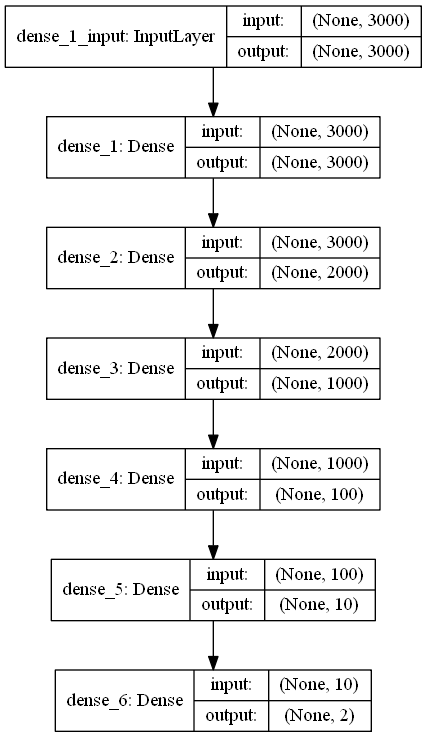

In [65]:
#Grafico el modelo
plot_model(model, show_shapes = True)

In [66]:
#Entreno el modelo
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=100).history

In [67]:
#Calculo el accuracy y la pérdida para Train y Test
train_scores = model.evaluate(X_train, y_train, verbose=0)
print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1],'\n')

test_scores = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Train loss: 0.2181262354540825
Train accuracy: 0.969980001449585 

Test loss: 0.44515823185443876
Test accuracy: 0.8686000108718872


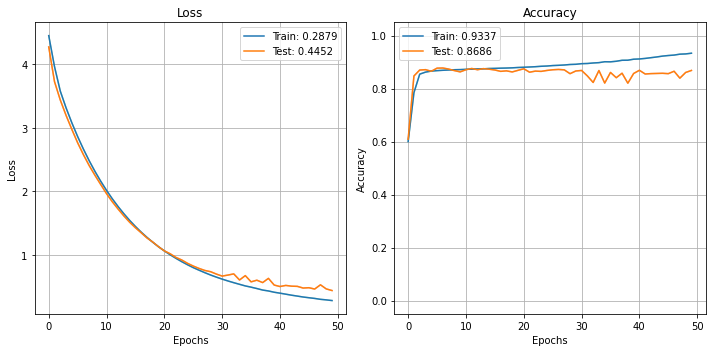

In [68]:
#Grafico la pérdida y la exactitud de acuerdo a las épocas
plot_history(history)
plt.show()

In [69]:
#winsound.Beep(freq, duration)

**Elección del número de épocas**

Al evaluar el gráfico de Loss y Accuracy, se puede ver que la pérdida disminuye a medida que aumentan las épocas. En el gráfico de accuracy, se puede ver que, a partir de la época 30, empieza a existir overfitting, ya que la diferencia entre el Train y Test aumenta. Por todas estas consideraciones, es que decido utilizar para el modelo un número de **30 épocas**.

- Red Neuronal con dataset TRAIN y DEV para `30 épocas`

In [70]:
#Determino el número de mi semilla
my_seed = 42

seed(my_seed)
tf.random.set_seed(my_seed)

In [71]:
#Determino el input
input_dim = X_train.shape[1]
print(input_dim)

3000


In [72]:
#Defino la red neuronal
model_30 = Sequential()
model_30.add(layers.Dense(3000, input_dim=input_dim, activation='relu'))
model_30.add(layers.Dense(2000, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.001)))
model_30.add(layers.Dense(1000, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.001)))
model_30.add(layers.Dense(100, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.001)))
model_30.add(layers.Dense(10, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.001)))
model_30.add(layers.Dense(2, activation='sigmoid'))

In [73]:
#Realizo la compilación con los parámetros seleccionados
model_30.compile(loss='binary_crossentropy', 
                 optimizer= 'sgd', 
                 metrics=['accuracy'])

In [74]:
#Imprimo un resumen del modelo
model_30.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 3000)              9003000   
_________________________________________________________________
dense_8 (Dense)              (None, 2000)              6002000   
_________________________________________________________________
dense_9 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dense_10 (Dense)             (None, 100)               100100    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 22        
Total params: 17,107,132
Trainable params: 17,107,132
Non-trainable params: 0
__________________________________________

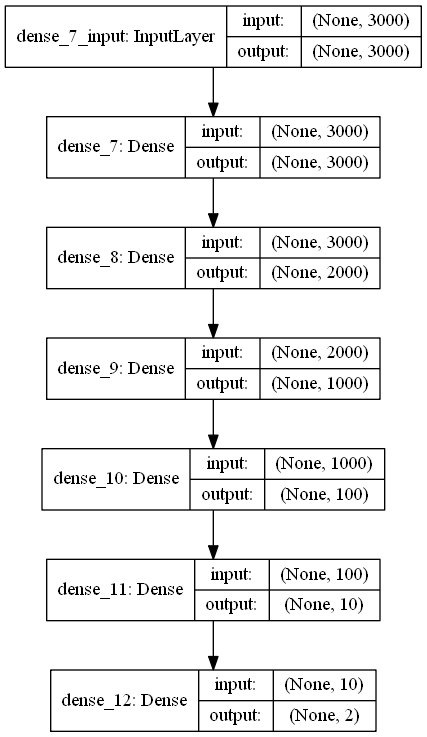

In [75]:
#Grafico el modelo
plot_model(model_30, show_shapes = True)

In [76]:
#Entreno el modelo
history_30 = model_30.fit(X_train, y_train,
                    epochs=30,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=100).history

In [77]:
#Calculo el accuracy y la pérdida para Train y Test
train_scores = model_30.evaluate(X_train, y_train, verbose=0)
print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1],'\n')

test_scores = model_30.evaluate(X_test, y_test, verbose=0)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Train loss: 0.6214522287416459
Train accuracy: 0.903980016708374 

Test loss: 0.7033260786056519
Test accuracy: 0.866599977016449


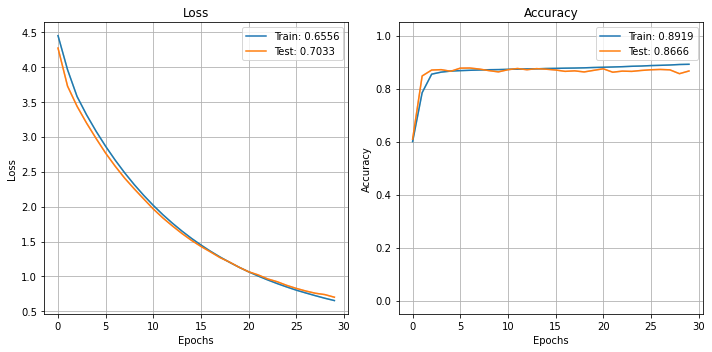

In [78]:
#Grafico la pérdida y la exactitud de acuerdo a las épocas
plot_history(history_30)
plt.show()

In [79]:
winsound.Beep(freq, duration)

Al evaluar el gráfico de Loss y Accuracy, se puede ver que la pérdida disminuye a medida que aumentan las épocas. En el gráfico de accuracy, se puede ver que, en la época 30, el accuracy es muy bueno mientras que a su vez  la diferencia entre el Train y Test no es grande.

**Predicción y matriz de confusión**

- Dado que para realizar la Red Neuronal y pedir en la capa de salida dos nodos, las etiquetas del y_test fueron encondeadas. Ahora volveré a definir a y_test.

In [80]:
#Defino nuevamente el y_test: 0 para negativa y 1 para positiva
y_test = dataset_dev_bin.iloc[:,5]
print(y_test)

0       0
1       0
2       0
3       0
4       0
       ..
4995    1
4996    1
4997    1
4998    1
4999    1
Name: label_positiva, Length: 5000, dtype: uint8


- Predicciones

Con el comando `.predict` devolverá la probabilidad para cada instancias, mientras que el comando `.predict_class` devolverá la clase de la predicción.

In [81]:
#Hago las predicciones 
y_pred_test_round = model_30.predict_classes(X_test)

In [82]:
#for i in y_pred_test_round:
#    print(i)

In [83]:
#Función para plotear la matriz de confusión
def confusion_bin(ytest,y_pred):
    names=['Negativa','Positiva']
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,fmt=".0f",ax=ax, cmap = 'magma')
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names, rotation = 45)
    ax.set_yticklabels(names, rotation = 45)
    plt.show()

    return

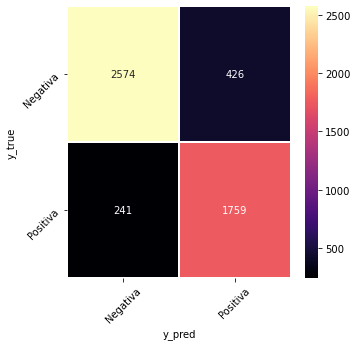

In [84]:
#Matriz de confusión para TEST
confusion_bin(y_test, y_pred_test_round)

**CONCLUSIÓN**: el nuevo modelo resultó en un accuracy para Train de 0.904 y para Test de 0.867. Predice de manera correcta un 86% de la etiqueta negativa y un 88% de la etiqueta positiva en el Test.

**Modelo a probrar con el dataset TEST**

A continuación probaré este modelo de Red Neuronal en el dataset TEST, el cual no utilicé aún. Esta es una manera de validar el modelo.

In [85]:
# Tomamos la lista de palabras y el vector que nos dice la calificación para TRAIN
lista_reviews_train_bin = list(dataset_train_bin['clean'].values)
label_train_bin = dataset_train_bin.iloc[:, [4,5]]

# Tomamos la lista de palabras y el vector que nos dice la calificación para TEST
lista_reviews_test_bin = list(dataset_test_bin['clean'].values)
label_test_bin = dataset_test_bin.iloc[:, [4,5]]

#print(label_train_bin)
#print(dataset_test_bin)

In [86]:
#Instanciamos 
tfidf_bin = TfidfVectorizer(ngram_range = (1,2), min_df = 30, max_features = 3000)

#Entreno y transformo en TRAIN
matriz_reviews_train_bin = tfidf_bin.fit_transform(lista_reviews_train_bin)

#Transformo en TEST
matriz_reviews_test_bin = tfidf_bin.transform(lista_reviews_test_bin)

print(matriz_reviews_train_bin.shape)
print(matriz_reviews_test_bin.shape)

(200000, 3000)
(5000, 3000)


In [87]:
#Cambio el tipo de dato de la matriz 'matriz_reviews_train_bin'
matriz_reviews_train_bin = matriz_reviews_train_bin.astype('float32')

#Cambio el tipo de dato de la matriz 'matriz_reviews_test_bin'
matriz_reviews_test_bin = matriz_reviews_test_bin.astype('float32')

- Modelado

In [88]:
#Con el dataset TRAIN determino el X_train y el y_train
X_train = matriz_reviews_train_bin.toarray()
y_train = label_train_bin

print(X_train.shape)
print(y_train.shape)

(200000, 3000)
(200000, 2)


In [89]:
#Con el dataset TEST determino el X_test y el y_test
X_test = matriz_reviews_test_bin.toarray()
y_test = label_test_bin

print(X_test.shape)
print(y_test.shape)

(5000, 3000)
(5000, 2)


- Red Neuronal con dataset TRAIN y TEST para `30 épocas`

- Lo primero que haré será establecer una semilla, para poder reproducir los resultados en el futuro.

In [90]:
#Determino el número de mi semilla
my_seed = 42

seed(my_seed)
tf.random.set_seed(my_seed)

In [91]:
#Determino el input
input_dim = X_train.shape[1]
print(input_dim)

3000


In [92]:
#Defino la red neuronal
model_test = Sequential()
model_test.add(layers.Dense(3000, input_dim=input_dim, activation='relu'))
model_test.add(layers.Dense(2000, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.001)))
model_test.add(layers.Dense(1000, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.001)))
model_test.add(layers.Dense(100, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.001)))
model_test.add(layers.Dense(10, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.001)))
model_test.add(layers.Dense(2, activation='sigmoid'))

In [93]:
#Realizo la compilación con los parámetros seleccionados
model_test.compile(loss='binary_crossentropy', 
                   optimizer= 'sgd', 
                   metrics=['accuracy'])

In [94]:
#Imprimo un resumen del modelo
model_test.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 3000)              9003000   
_________________________________________________________________
dense_14 (Dense)             (None, 2000)              6002000   
_________________________________________________________________
dense_15 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_16 (Dense)             (None, 100)               100100    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 22        
Total params: 17,107,132
Trainable params: 17,107,132
Non-trainable params: 0
__________________________________________

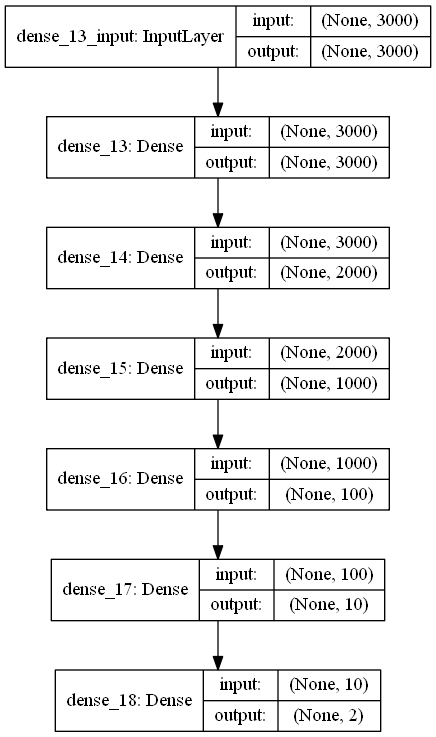

In [95]:
#Grafico el modelo
plot_model(model_test, show_shapes = True)

In [96]:
#Entreno el modelo
history_test = model_test.fit(X_train, y_train,
                              epochs=30,
                              verbose=False,
                              validation_data=(X_test, y_test),
                              batch_size=100).history

In [97]:
#Calculo el accuracy y la pérdida para Train y Test
train_scores = model_test.evaluate(X_train, y_train, verbose=0)
print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1],'\n')

test_scores = model_test.evaluate(X_test, y_test, verbose=0)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Train loss: 0.6214522287416459
Train accuracy: 0.903980016708374 

Test loss: 0.697654731464386
Test accuracy: 0.8622000217437744


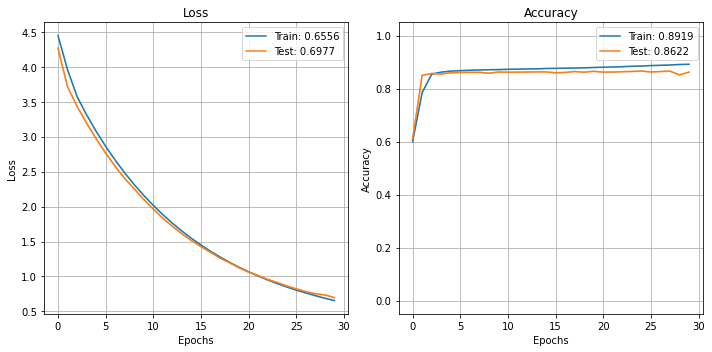

In [98]:
#Grafico la pérdida y la exactitud de acuerdo a las épocas
plot_history(history_test)
plt.show()

In [99]:
#winsound.Beep(freq, duration)

Al evaluar el gráfico de Loss y Accuracy, se puede ver que la pérdida disminuye a medida que aumentan las épocas. En el gráfico de accuracy, se puede ver que, en la época 30, el accuracy es muy bueno mientras que a su vez  la diferencia entre el Train y Test no es grande.

**Predicción y matriz de confusión**

- Dado que para realizar la red neuronal y pedir en la capa de salida dos nodos, las etiquetas del y_test fueron encondeado. Ahora volveré a definir a y_test.

In [100]:
#Defino nuevamete el y_test
y_test = dataset_test_bin.iloc[:,5]
print(y_test)

0       0
1       0
2       0
3       0
4       0
       ..
4995    1
4996    1
4997    1
4998    1
4999    1
Name: label_positiva, Length: 5000, dtype: uint8


- Predicciones

Con el comando `.predict` devolverá la probabilidad para cada instancias, mientras que el comando `.predict_class` devolverá la clase de la predicción.

In [101]:
#Hago las predicciones 
y_pred_test_round = model_test.predict_classes(X_test)

In [102]:
#for i in y_pred_test_round:
#    print(i)

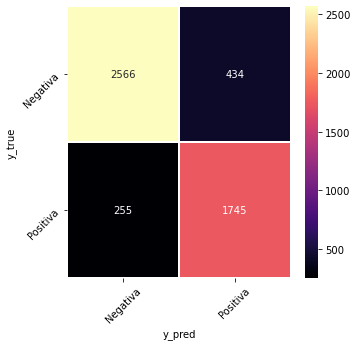

In [103]:
#Matriz de confusión para TEST
confusion_bin(y_test, y_pred_test_round)

**CONCLUSIÓN**: La validación del modelo en el dataset TEST resultó en resultados similares al modelo evaluado con el dataset DEV. El accuracy para Train fue de 0.904 y para Test de 0.862. Esto quiere decir, que el modelo, al ser probado con datos que nunca ha visto (ni para entrenar) resulta en un buen modelo.

### COMPARACIÓN CON EL MODELO BENCHMARK

El nuevo modelo resultó en un aumento de casi un 10% en Train y de un 4% en Test, respecto al modelo benchmark.

La predicción correcta de la etiqueta positiva aumentó en un 13.20% (benchmark: 74.05%; nuevo modelo: 87.25%). 

Cabe destacar que si bien, la predicción correcta de la etiqueta negativa disminuyó  un poco mas de un 2% respecto al benchmark, el modelo es mucho mas equilibrado: predice correctamente un porcentaje muy similar de las etiquetas positivas y negativas, no teniendo un sesgo hacia las negativas como se puede observa en el modelo benckmark.

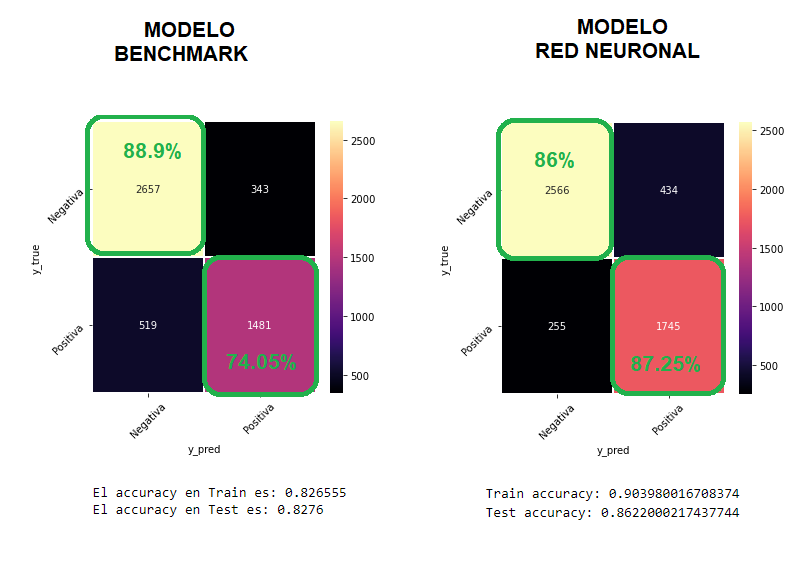

## CONCLUSIÓN FINAL

Al mejorar el Análisis Exploratorio de Datos (EDA), se pudo observar que, algunas palabras de importacia y que se encontraban en alta frecuencia en las etiquetas positivas y negativas, eran eliminadas por ser contenidas dentro de las `stop words` provistas por la librería spaCy. 

Por otro lado, la utlización de un modelo de Red Neuronal, mejoró el rendimiento del modelo benchmark tanto en Train como en Test. Además, el porcentaje de predicción correcta tanto de las etiquetas posiitivas como negativas fue muy equilibrado.

Por otro lado, el nuevo modelo generado no sólo mejoró el rendimiento en relación al benchmark, sino que además, al evaluarlo con el dataset TEST (dataset que no fue usado para entrenar) para validarlo, generó un rendimiento similar al obtenido con el dataset DEV (dataset con el cual fue optmizado).

A modo de resumen final, la combinación de la mejora del EDA y la generación de un modelo de Red Neuronal, resultó en una mejora al modelo planteado en el proyecto 3 (llamado hasta ahora modelo benchmark).

**NOTA: ¿Sería necesario incorporar información de otra fuente?**

A través de la estrategia de mejorar el EDA incorporando palabras nuevas y usando un modelo de Redes Neuronales, el rendimiento general del modelo mejoró. Por ello considero que no sería necesario incorporar otra fuente de información adicional.